<a href="https://colab.research.google.com/github/nurfnick/Mathematical_Musings/blob/main/CrapsSimulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Craps Simulator for One Shooter

In [1]:
import random

random.randint(1,6)

4

Above code rolls a dice once.

In [2]:
def Roll2Dice():
  return [random.randint(1,6),random.randint(1,6)]

In [3]:
Roll2Dice()

[6, 3]

This rolls two dies

In [7]:
from numpy import histogram
listy = []

for i in range(1000):
  listy.append(sum(Roll2Dice()))

histogram(listy,bins = 11)

(array([ 18,  57,  89, 112, 134, 179, 127, 114,  92,  51,  27]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        ]))

In [8]:
sums = range(2,13,1)
newlist =[]
for i in sums:
  newlist.append(0)

for i in listy:
  for j in sums:
    if i == j:
      newlist[i-2] +=1

newlist

[18, 57, 89, 112, 134, 179, 127, 114, 92, 51, 27]

Above I have checked that the outcomes are random but as expected.  Both codes do the same thing


In [15]:
def ComeOutRoll(TwoDice):
  s = sum(TwoDice)
  if (s == 2)|(s == 3)|(s==12):
    return 'Craps'
  elif (s == 7)|(s == 11):
    return 'comeAgain'
  else:
    return s #return the point

ComeOutRoll([4,4])

8

In [16]:
ComeOutRoll([6,6])

'Craps'

The `ComeOutRoll` is the first roll in the craps game.  There are three options **Craps** (2,3,12) **Natural** (7,11) (designated here as 'comeAgain' since you will get another come out roll.  Any othe value will set the point, the function just returns that number.

In [10]:
def SetPointRoll(TwoDice,point):
  s = sum(TwoDice)
  if s == 7:
    return 'SevenOut'
  elif s == point:
    return 'comeAgain'
  else:
    return point

SetPointRoll([5,4],9)

'comeAgain'

In [11]:
SetPointRoll([3,4],4)

'SevenOut'

In [12]:
SetPointRoll([3,1],5)

5

After the point has been set, you will roll over and over again until you **comeAgain** by hitting the same point or **SevenOut** by rolling a 7.  The function returns the point if neither of those happen.

In [17]:
def PlayCraps():
  x = ComeOutRoll(Roll2Dice())
  rollCounter = 1
  while (x != 'Craps')&(x != 'SevenOut'):
    if x == 'comeAgain':
      rollCounter += 1
      x = ComeOutRoll(Roll2Dice())
    else:
      point = x
      rollCounter += 1
      x = SetPointRoll(Roll2Dice(),point)
  return rollCounter


In [23]:
PlayCraps()

10

`PlayCraps` will play the game returning the number of rolls until you **Crap** or **SevenOut**.  Let's compute some statistics about it.

In [27]:

list1 = []
for i in range(10000):
  list1.append(PlayCraps())
sum(list1)/len(list1)


6.6286

(array([6.212e+03, 2.420e+03, 8.970e+02, 2.760e+02, 1.320e+02, 4.300e+01,
        1.100e+01, 4.000e+00, 0.000e+00, 5.000e+00]),
 array([ 1. ,  6.7, 12.4, 18.1, 23.8, 29.5, 35.2, 40.9, 46.6, 52.3, 58. ]),
 <a list of 10 Patch objects>)

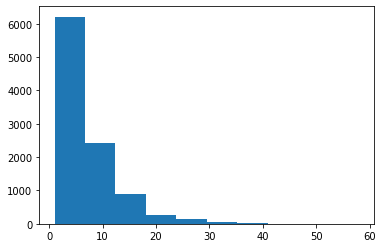

In [28]:
import matplotlib.pyplot as plt

plt.hist(list1)

The distribution is not normal!  Seems like it is mostly just a few rolls.  I wonder what the expected or average value is.

In [30]:
list2 = []
for j in range(1000):
  list1 = []
  for i in range(1000):
    list1.append(PlayCraps())
  list2.append(sum(list1)/len(list1))

(array([  3.,  11.,  43., 117., 205., 261., 199., 117.,  33.,  11.]),
 array([5.994 , 6.1164, 6.2388, 6.3612, 6.4836, 6.606 , 6.7284, 6.8508,
        6.9732, 7.0956, 7.218 ]),
 <a list of 10 Patch objects>)

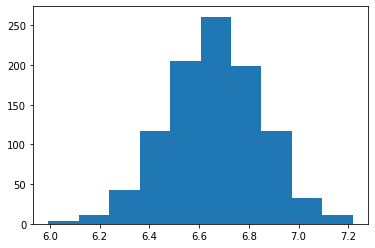

In [31]:
plt.hist(list2)

In [32]:
from numpy import mean

mean(list2)

6.659105

As I perused the internet for this value, I found lots of answers that were larger!  How can that be!  At first I thought I had the program wrong.  Below I write some code to check the craps game by hand.

In [38]:
def ErrorTestingPlayCraps():
  listOfRolls = []
  randRoll = Roll2Dice()
  listOfRolls.append(randRoll)
  x = ComeOutRoll(randRoll)
  rollCounter = 1
  PassLineWins = 0
  while (x != 'Craps')&(x != 'SevenOut'):
    if x == 'comeAgain':
      listOfRolls.append('Pass Line Win')
      PassLineWins += 1
      rollCounter += 1
      randRoll = Roll2Dice()
      listOfRolls.append(randRoll)
      x = ComeOutRoll(randRoll)
    else:
      point = x
      rollCounter += 1
      randRoll = Roll2Dice()
      listOfRolls.append(randRoll)
      listOfRolls.append(point)
      x = SetPointRoll(randRoll,point)
  else:
    listOfRolls.append(x)
  return rollCounter, listOfRolls

In [39]:
ErrorTestingPlayCraps()

(2, [[6, 5], 'Pass Line Win', [1, 1], 'Craps'])

In [40]:
ErrorTestingPlayCraps()

(17,
 [[3, 6],
  [1, 5],
  9,
  [5, 1],
  9,
  [5, 5],
  9,
  [4, 5],
  9,
  'Pass Line Win',
  [1, 5],
  [6, 4],
  6,
  [4, 1],
  6,
  [5, 4],
  6,
  [4, 4],
  6,
  [4, 1],
  6,
  [1, 2],
  6,
  [2, 3],
  6,
  [5, 4],
  6,
  [5, 3],
  6,
  [1, 3],
  6,
  [1, 6],
  6,
  'SevenOut'])

This simulation is more fun as it really shows you what happens on each roll.


Trying this ***many*** times, I did not see an error.  This makes me feel like the references _____________________ have an error in their computation.  Let's see if we can find the value theoretically we have simulated!